Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Customer ID        7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless 

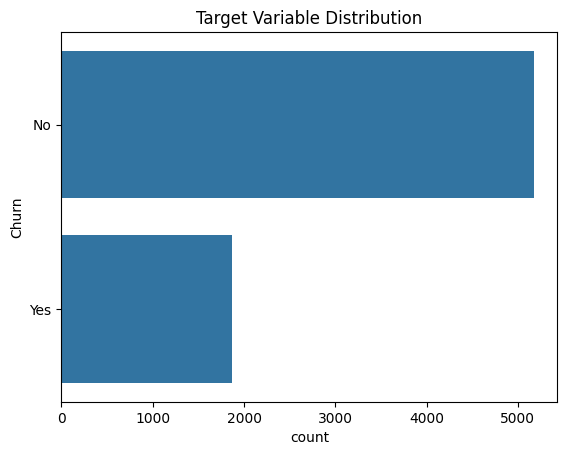

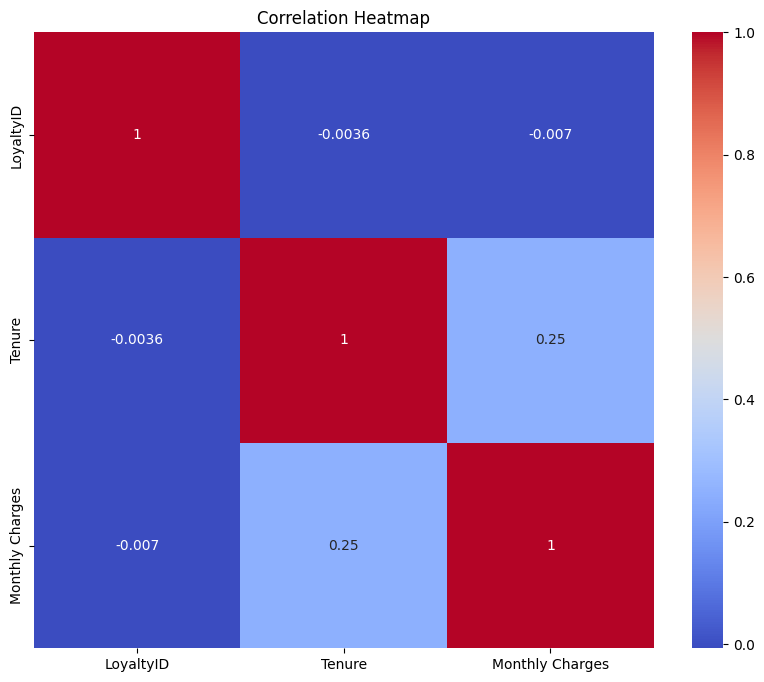

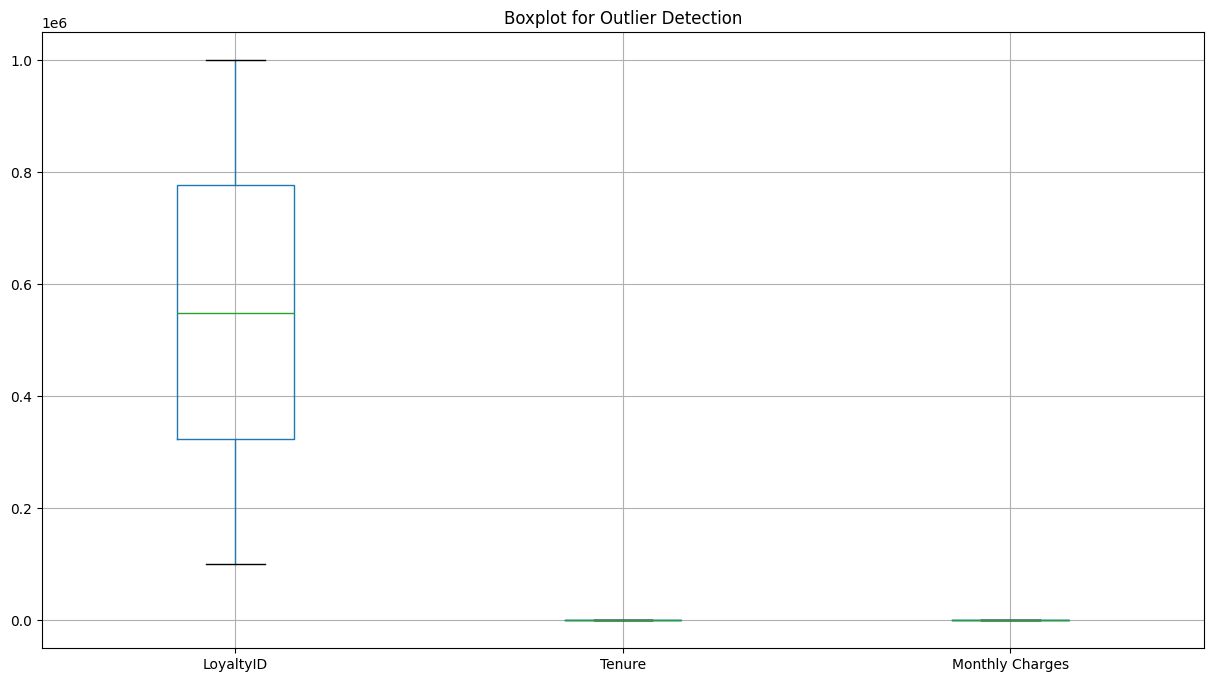

Explained Variance by PCA: [0.17801706 0.11398609 0.07476079 0.06081578 0.05337334]

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.68      0.55      0.61       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113


Random Forest Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1539
           1       0.70      0.51      0.59       574

    accuracy                           0.81      2113
   macro avg       0.77      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113


Silhouette Score for K-Means: 0.12206196272552623


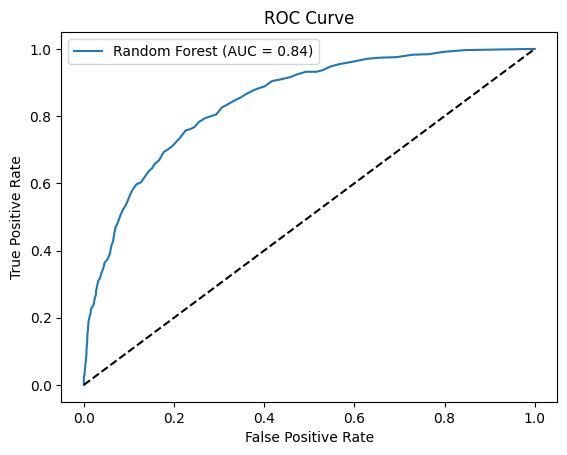

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, silhouette_score


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/CustomerChurn.csv')

# Exploratory Data Analysis (EDA)
def perform_eda(data):
    print("Dataset Info:")
    print(data.info())

    print("\nDataset Description:")
    print(data.describe())


    print("\nMissing Values:")
    print(data.isnull().sum())


    print("\nSample Data:")
    print(data.head())


    sns.countplot(data['Churn'])
    plt.title('Target Variable Distribution')
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    numerical_data = data.select_dtypes(include=np.number)
    sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

    # Outlier detection using boxplot
    data.boxplot(figsize=(15, 8))
    plt.title('Boxplot for Outlier Detection')
    plt.show()

perform_eda(df)  # Call the EDA function

# Data Preprocessing
def preprocess_data(data):
    imputer = SimpleImputer(strategy='mean')
    for col in data.select_dtypes(include=np.number).columns:
        data[col] = imputer.fit_transform(data[[col]])

    label_encoders = {}
    for col in data.select_dtypes(include='object').columns:
        label_encoders[col] = LabelEncoder()
        data[col] = label_encoders[col].fit_transform(data[col])


    scaler = StandardScaler()
    num_features = data.select_dtypes(include=np.number).columns
    data[num_features] = scaler.fit_transform(data[num_features])


    data['Churn'] = data['Churn'].apply(lambda x: 1 if x >= 0.5 else 0)

    return data, label_encoders
df, encoders = preprocess_data(df)

# Feature Engineering
def feature_engineering(data):

    pca = PCA(n_components=5)
    pca_features = pca.fit_transform(data.drop(columns=['Churn']))
    print(f"Explained Variance by PCA: {pca.explained_variance_ratio_}")

    return pd.DataFrame(pca_features)

pca_df = feature_engineering(df)
# Model Building

def build_models(data):

    X = data.drop(columns=['Churn'])
    y = data['Churn']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Logistic Regression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred_lr = log_reg.predict(X_test)
    print("\nLogistic Regression Report:")
    print(classification_report(y_test, y_pred_lr))

    # Random Forest Classifier
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print("\nRandom Forest Report:")
    print(classification_report(y_test, y_pred_rf))

    # Clustering using K-Means
    kmeans = KMeans(n_clusters=2, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"\nSilhouette Score for K-Means: {silhouette_avg}")

    # ROC Curve for Random Forest
    rf_probs = rf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, rf_probs)
    plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, rf_probs)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

build_models(df)
